In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

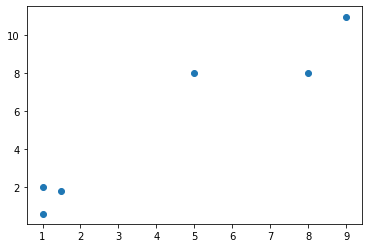

In [39]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [40]:
class K_Means:
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, data):
        self.means = [] # randomly initialize
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for point in data:
                distances = [((point - m)**2).sum() for m in self.means]
                min_dist = min(distances)
                l = distances.index(min_dist)
                clusters[l].append(point)

            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis=0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break


    def predict(self, test_data):
        predictions = []
        for point in test_data:
            distances = [((point - m)**2).sum() for m in self.means]
            min_dist = min(distances)
            l = distances.index(min_dist)
            predictions.append(l)
        return predictions

In [45]:
kmeans = K_Means(2, 10)

In [46]:
kmeans.fit(x)

In [47]:
kmeans.predict(x)

[0, 0, 1, 1, 0, 1]

In [48]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]